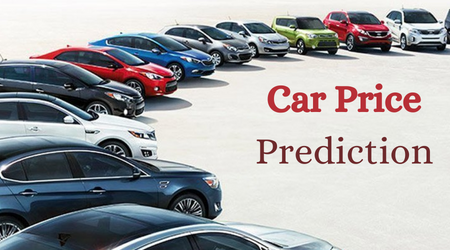

In [1]:
#Import the requirment libraries with dataset.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')
import seaborn as sns

In [2]:
#Import the dataset.

cars = pd.read_csv('quikr_car.csv')

In [3]:
cars.sample(5)

,name,company,year,Price,kms_driven,fuel_type
736,Hyundai Getz GLE,Hyundai,2007,"99,000","55,000 kms",Petrol
385,Maruti Suzuki Swift Dzire car,Maruti,sale,"3,00,000",NaN,NaN
701,Tata Indigo CS GLS,Tata,2017,"2,70,000","50,000 kms",Diesel
419,Hyundai i20 Magna O 1.2,Hyundai,2013,"3,10,000","35,000 kms",Petrol
700,Volkswagen Vento Comfortline Diesel,Volkswagen,2011,"2,00,000","95,000 kms",Diesel


In [4]:
#bacis understanding for data.

cars.shape

(892, 6)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
cars.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [7]:
cars.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


# Cleaning Process

## Now check the quality of data.

In [8]:
#create the backup for our data.

backup=cars.copy()

In [9]:
# Our quality cheklist.

#1.names are pretty inconsistent
#2.names have company names attached to it
#3.some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
#4.company: many of the names are not of any company like 'Used', 'URJENT', and so on.
#5.year has many non-year values
#6.year is in object. Change to integer
#7.Price has Ask for Price
#8.Price has commas in its prices and is in object
#9.kms_driven has object values with kms at last.
#10.It has nan values and two rows have 'Petrol' in them
#11.fuel_type has nan value

In [10]:
cars.sample(5)

,name,company,year,Price,kms_driven,fuel_type
431,Tata Manza ELAN Quadrajet,Tata,2010,"1,55,555","1,11,111 kms",Petrol
477,Maruti Suzuki Baleno Delta 1.2,Maruti,2016,"4,98,000","22,000 kms",Petrol
878,Mercedes Benz C Class 200 K MT,Mercedes,2006,"5,00,001","15,000 kms",Petrol
487,Maruti Suzuki Ertiga Vxi,Maruti,2015,"5,50,000","75,000 kms",Petrol
28,Maruti Suzuki Alto LX,Maruti,2008,"95,000","70,000 kms",Petrol


In [11]:
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB
None


In [12]:
#In the company column some value are not car company name.
print(cars['company'].unique().tolist())

#In the price column ask for price present, It's not similer to other value.
print(cars['Price'].unique().tolist())

#In this column we saw value type are <<num.+str.>>.
print(cars['kms_driven'].unique().tolist())

#In fuel column nan value.
print(cars['fuel_type'].unique().tolist())

#In year column some values are string.
print(cars['year'].tolist())

['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota', 'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen', 'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha', 'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata', 'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9', 'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara']
['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000', '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000', '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000', '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000', '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000', '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000', '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000', '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000', '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000', '1,10,000', '4,48,9

### Now the action time

#### For Year

In [13]:
cars=cars[cars['year'].str.isnumeric()]

In [14]:
cars['year']=cars['year'].astype(int)

#### For Price

In [15]:
cars=cars[cars['Price']!='Ask For Price']

In [16]:
cars['Price']=cars['Price'].str.replace(',','').astype(int)

#### For KMS_Driven

In [17]:
cars['kms_driven']=cars['kms_driven'].str.split().str.get(0).str.replace(',','')

In [18]:
cars=cars[cars['kms_driven'].str.isnumeric()]

In [19]:
cars['kms_driven']=cars['kms_driven'].astype(int)

#### For Fuel Type

In [20]:
cars=cars[~cars['fuel_type'].isna()]

In [21]:
cars.shape

(816, 6)

#### For Comapny Name

In [22]:
cars['name']=cars['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [23]:
cars=cars.reset_index(drop=True)

### Final Data

In [24]:
cars

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [25]:
cars.to_csv('Final_Car_Data.csv')

In [26]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [27]:
cars.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [28]:
#Milestone step
cars=cars[cars['Price']<6000000]

### It's time to visual for the better understanding.

In [29]:
#Unique Company
print(cars['company'].unique().tolist())

['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota', 'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force', 'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo']


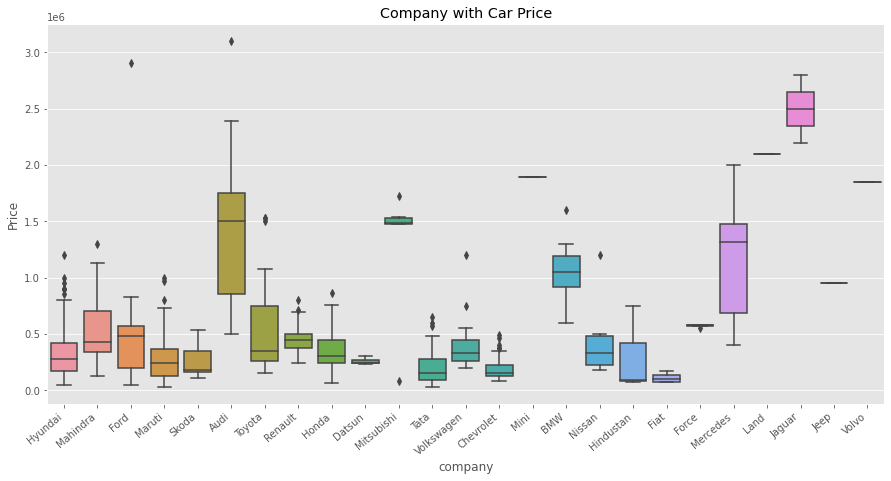

In [30]:
#BoxPlot with Company and Car Price

plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=cars)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
ax.set_title('Company with Car Price')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


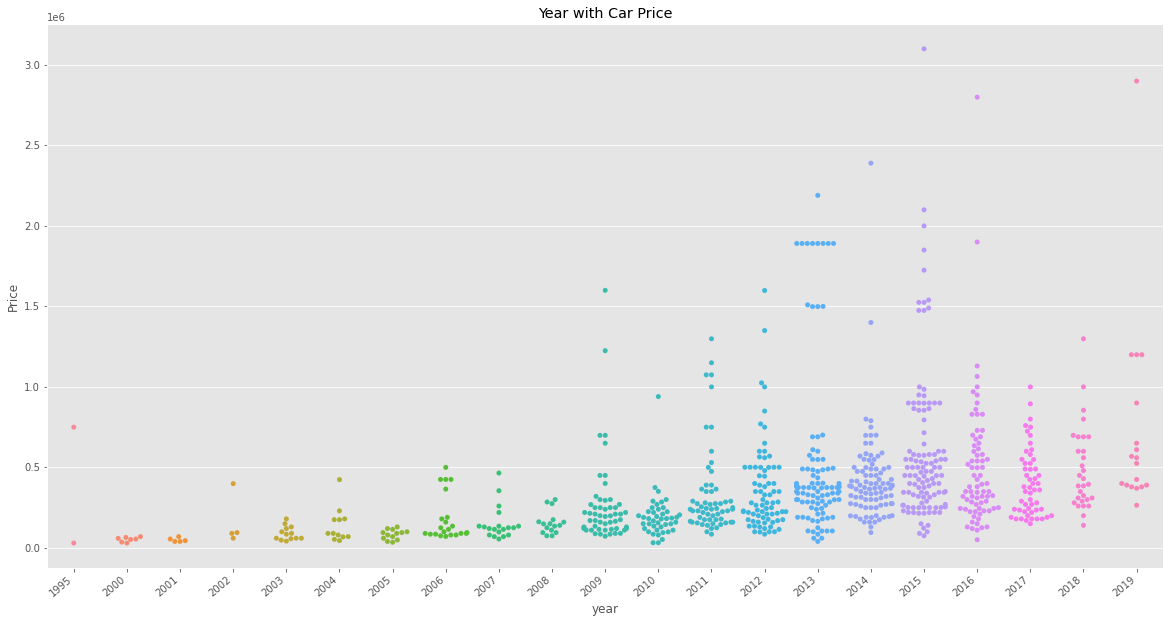

In [31]:
#With year and Price.

plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=cars)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
ax.set_title('Year with Car Price')
plt.show()

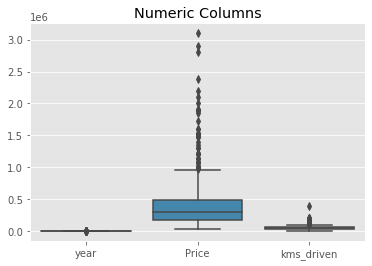

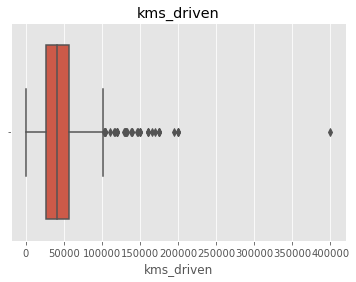

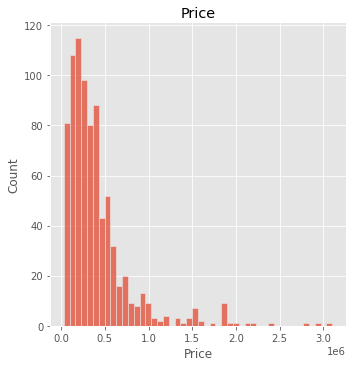

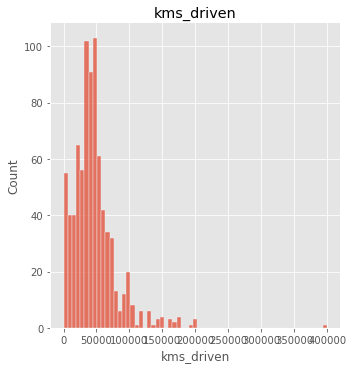

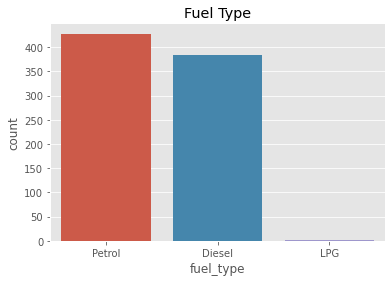

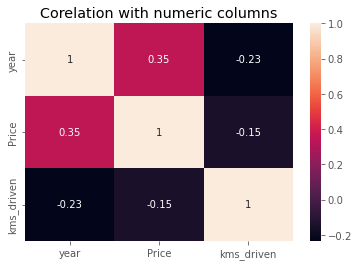

In [32]:
#Understanding for numeric columns
sns.boxplot(data=cars).set_title("Numeric Columns")
plt.show()

sns.boxplot(data=cars, x='kms_driven').set_title("kms_driven")
plt.show()

sns.displot(data=cars,  x='Price')
plt.title("Price")
plt.show()

sns.displot(data=cars,  x='kms_driven')
plt.title("kms_driven")
plt.show()

sns.countplot(data=cars, x='fuel_type').set_title("Fuel Type")
plt.show()

sns.heatmap(cars.corr(), annot=True).set_title("Corelation with numeric columns")
plt.show()

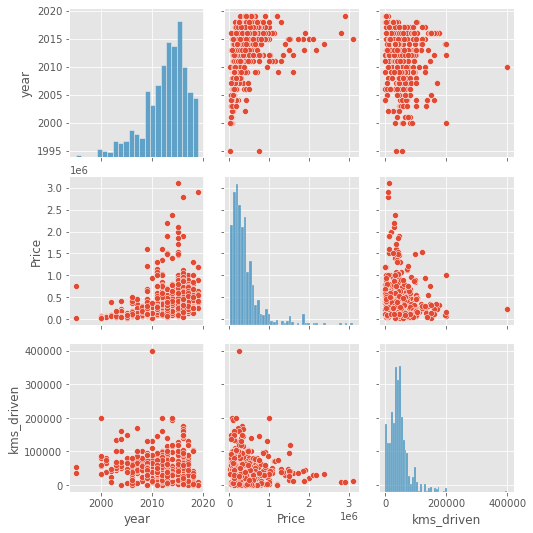

In [33]:
#Pair relation for numeric column
sns.pairplot(cars)
plt.show()

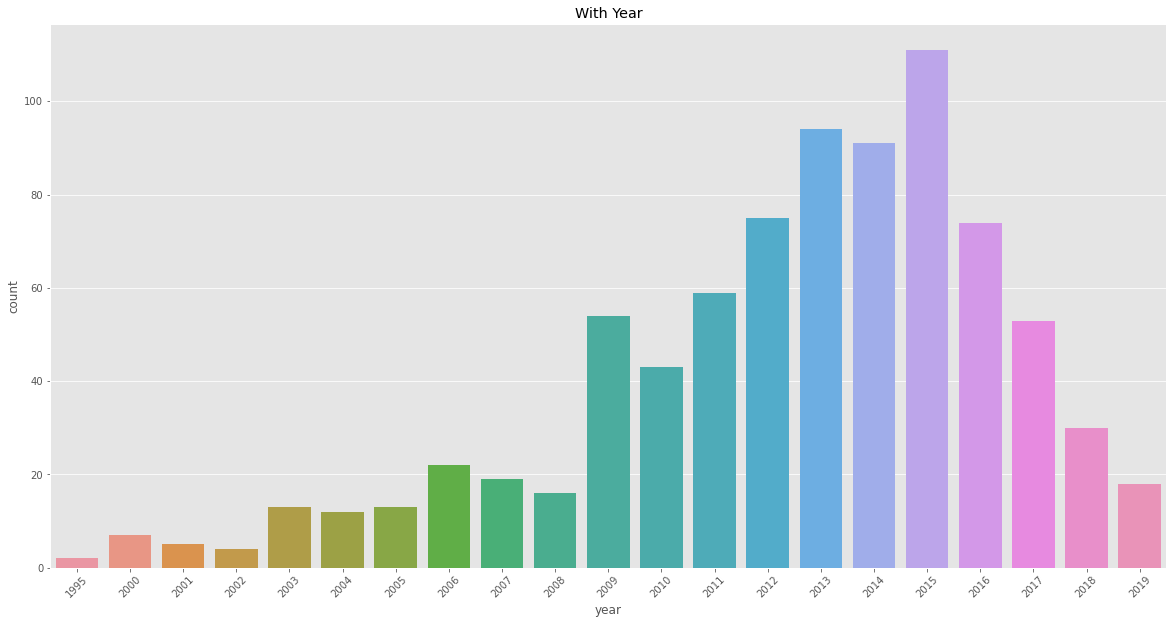

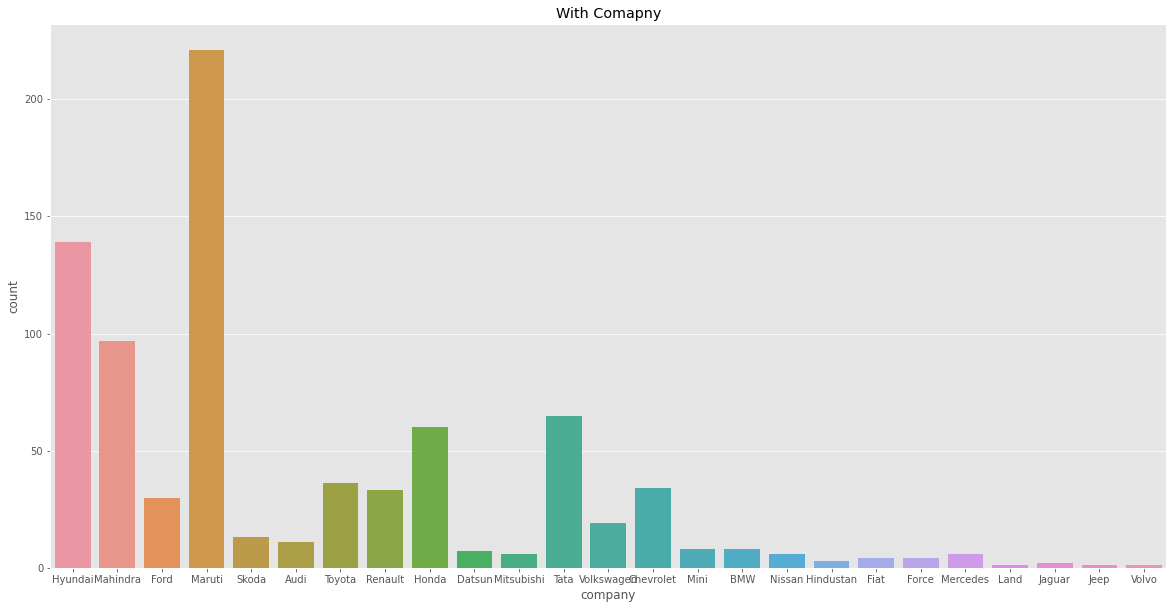

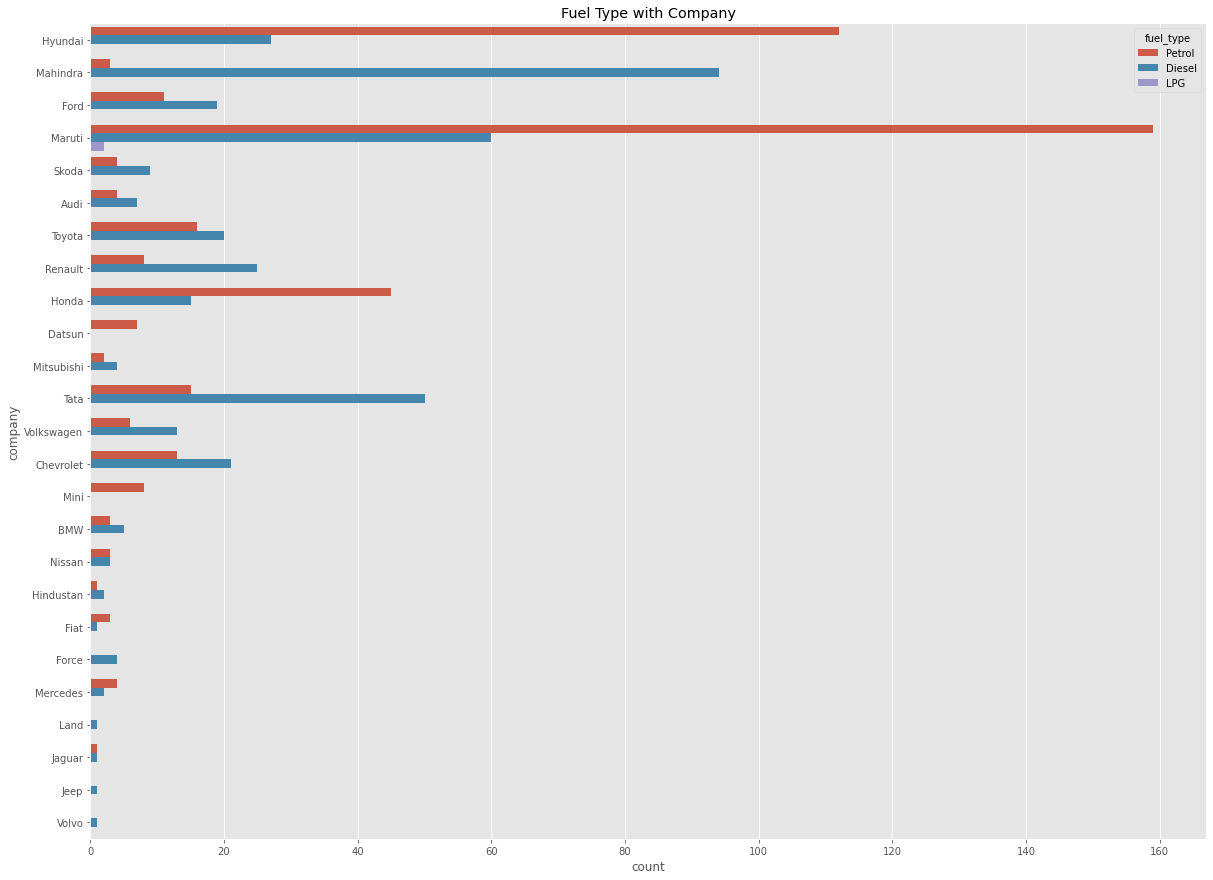

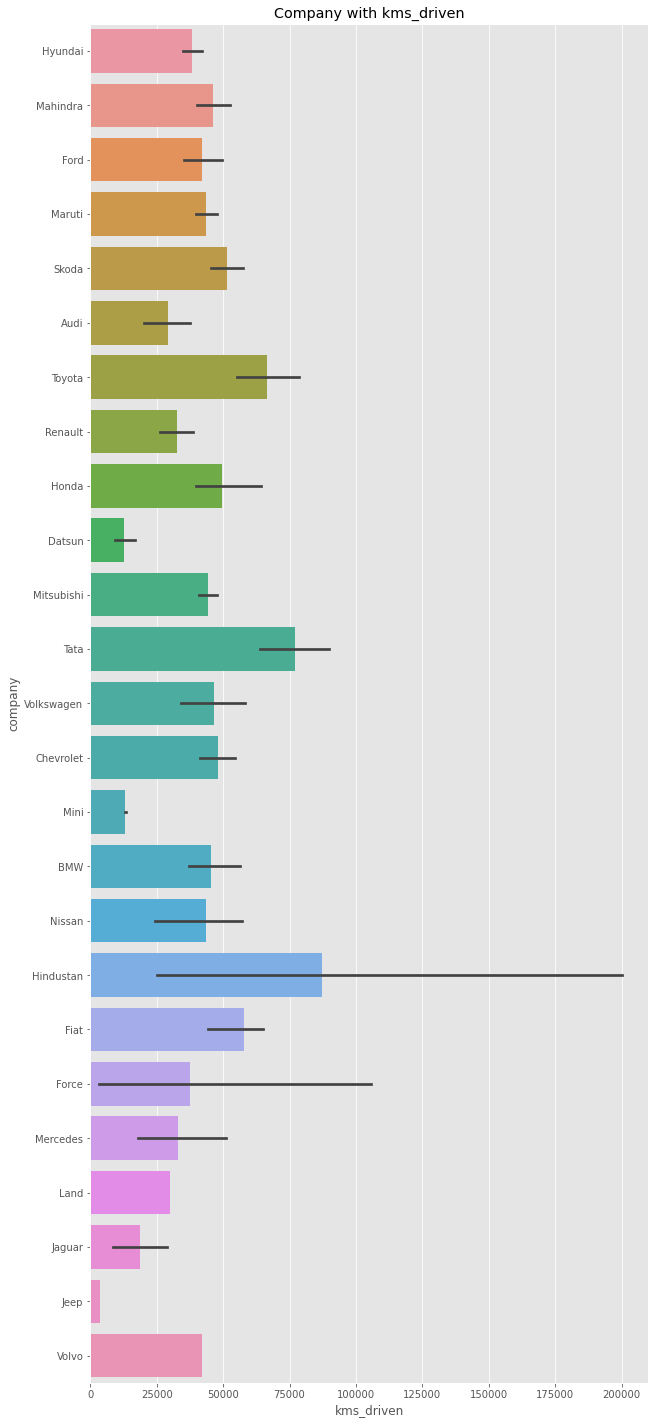

In [34]:
#With Year.
plt.subplots(figsize=(20,10))
ax=sns.countplot(data=cars, x='year')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
ax.set_title('With Year')
plt.show()


#With Comapny.
plt.subplots(figsize=(20,10))
sns.countplot(data=cars, x='company').set_title('With Comapny')
plt.show()

#With Comapny and Fuel Type
plt.subplots(figsize=(20,15))
sns.countplot(data=cars, y='company', hue='fuel_type').set_title('Fuel Type with Company')
plt.show()

#With Comapny and KMS_Driven
plt.subplots(figsize=(10,25))
sns.barplot(data=cars, y='company', x='kms_driven').set_title('Company with kms_driven')
plt.show()

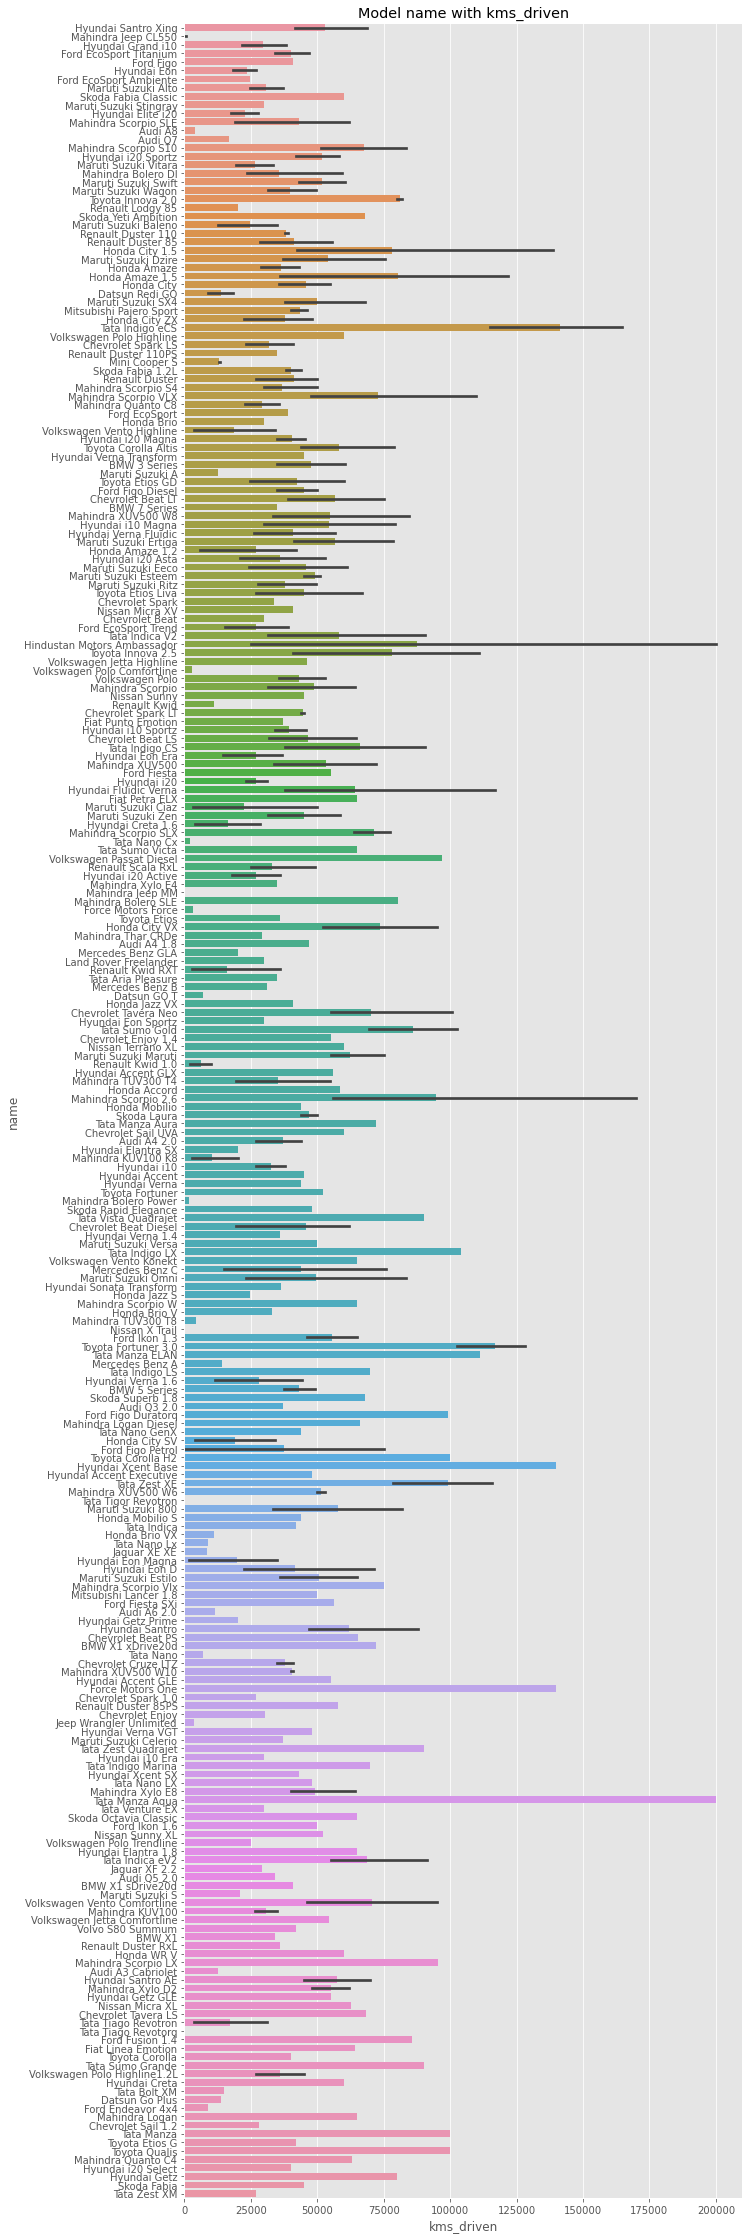

In [35]:
#With model name and KMS_Driven

plt.subplots(figsize=(10,40))
sns.barplot(data=cars, y='name', x='kms_driven').set_title('Model name with kms_driven')
plt.show()

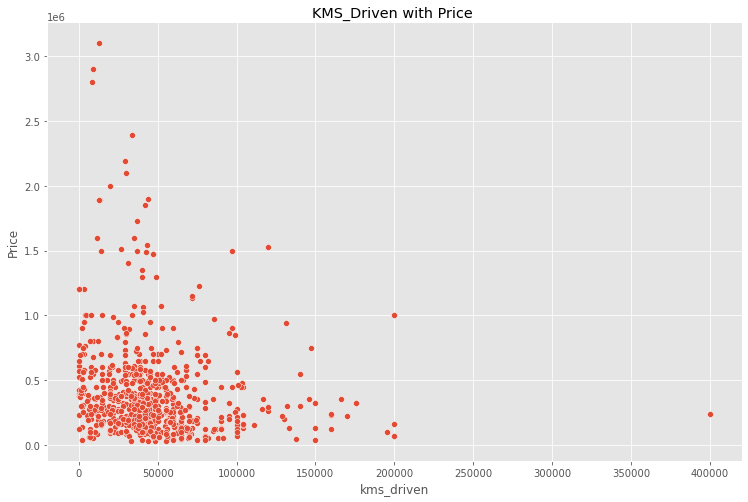

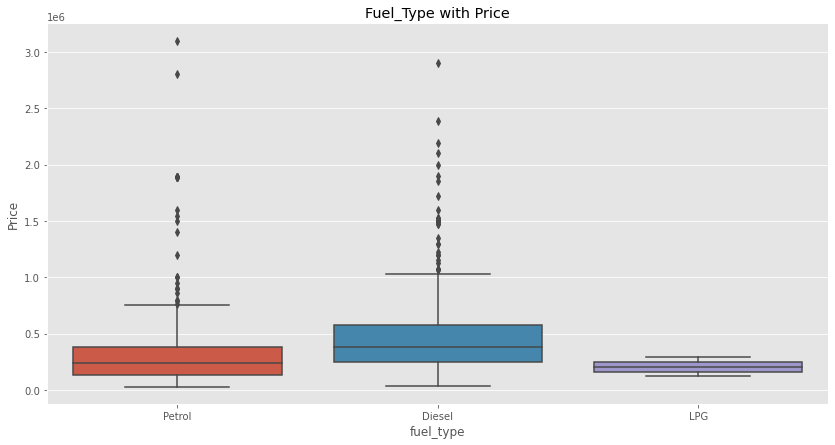

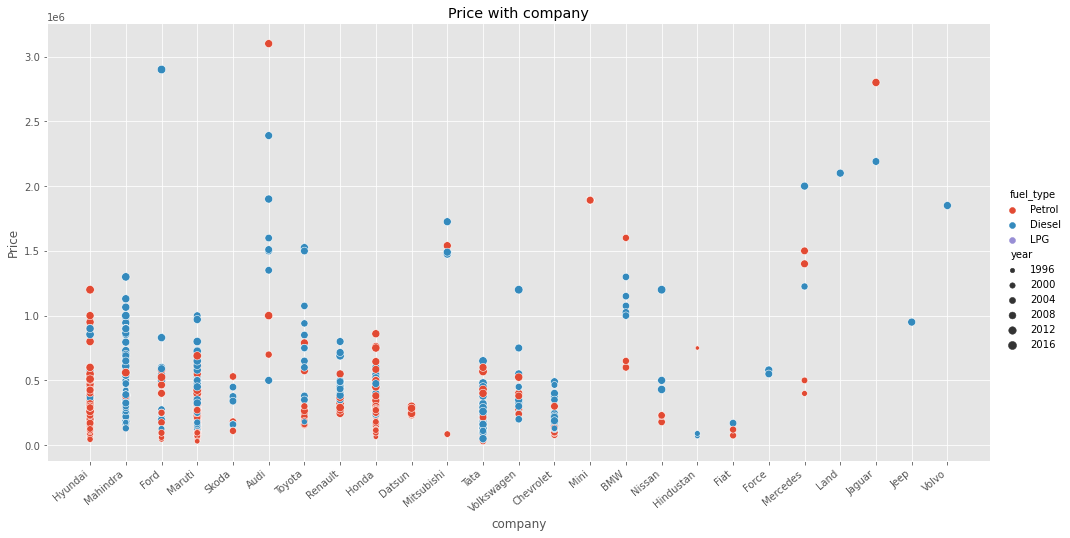

In [36]:
#KMS_Driven with Price
sns.relplot(x='kms_driven',y='Price',data=cars,height=7,aspect=1.5)
plt.title('KMS_Driven with Price ')
plt.show()

#Fuel_Type with Price
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=cars).set_title("Fuel_Type with Price")
plt.show()

#Company with Price
ax=sns.relplot(x='company',y='Price',data=cars,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')
ax=plt.title('Price with company')
plt.show()

# Now Model Building

In [70]:
#Extrat traning data

X=cars[['name','company','year','kms_driven','fuel_type']]
Y=cars['Price']

In [71]:
X.shape

(815, 5)

In [72]:
Y.shape

(815,)

In [73]:
#Now Train Test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [74]:
#With LinearRegression 

from sklearn.linear_model import LinearRegression

In [75]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [76]:
#Now encoding for catagorical column

ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [77]:
#With ColumnTransformer

column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [78]:
#Import LinearRegression

lr = LinearRegression()

In [79]:
#Creat a pipeline.

pipe=make_pipeline(column_trans,lr)

In [80]:
#Fit the model

pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [81]:
#Now predict for test data.

y_pred=pipe.predict(X_test)

In [82]:
#Check acc. score.

r2_score(y_test,y_pred)

0.5618251508001395

In [83]:
#We have create a acc. loop for 1000-times.

scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [84]:
print(scores)

[0.8108003788066478, 0.6021348073838837, 0.6967322672012569, 0.5091406838342373, 0.8782058689257908, 0.755549616498922, 0.438281940244704, 0.6341247113534997, 0.596218779614885, 0.7320867569884553, 0.8062674302746954, 0.7639567782407295, 0.49224006648335206, 0.7597877092561924, 0.780245334673262, 0.6877845573374362, 0.6469396794101137, 0.7131671480642364, 0.737138358912834, 0.7772554000502417, 0.7966353852687997, 0.4031494312559897, 0.7791389593555894, 0.7760284677948157, 0.5784687693060302, 0.5045020241243857, 0.7348883298697171, 0.832537095072648, 0.8286194764768233, 0.6119037868913971, 0.6233911663906673, 0.85413258227155, 0.7151043430901014, 0.7902254583103642, 0.8211273372309528, 0.7959453358304414, 0.4920562649875111, 0.7101454642198634, 0.6930596846517392, 0.8410605792041311, 0.5243274768618378, 0.687279888719075, 0.5823266218463372, 0.7033710595427982, 0.8185891924200018, 0.7345581905756646, 0.5905303435583529, 0.5225847614613064, 0.8807643655493671, 0.8577411107973556, 0.53570

In [85]:
#Find MAX. acc. score.

print(scores[np.argmax(scores)])

#with postion.
print(np.argmax(scores))

0.9200782884083312
655


In [86]:
#Now test out model.

pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Wagon','Maruti',2013,39000,'Petrol']).reshape(1,5)))



array([217246.3393875])

In [87]:
#In the loop----

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)
    

0.9200782884083312

In [88]:
#Now dump the model

import pickle

pickle.dump(pipe,open('LR.pkl','wb'))



In [89]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese